In [26]:
import json

import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("results/results.json", "r") as f:
    results = json.load(f)

In [5]:
print(f"The full model gets an accuracy of {100*results['full_accuracy']:.1f}%.")
print(f"The model using only labeled data gets {100*results['labeled_accuracy']:.1f}%.")

The full model gets an accuracy of 86.4%.
The model using only labeled data gets 68.2%.


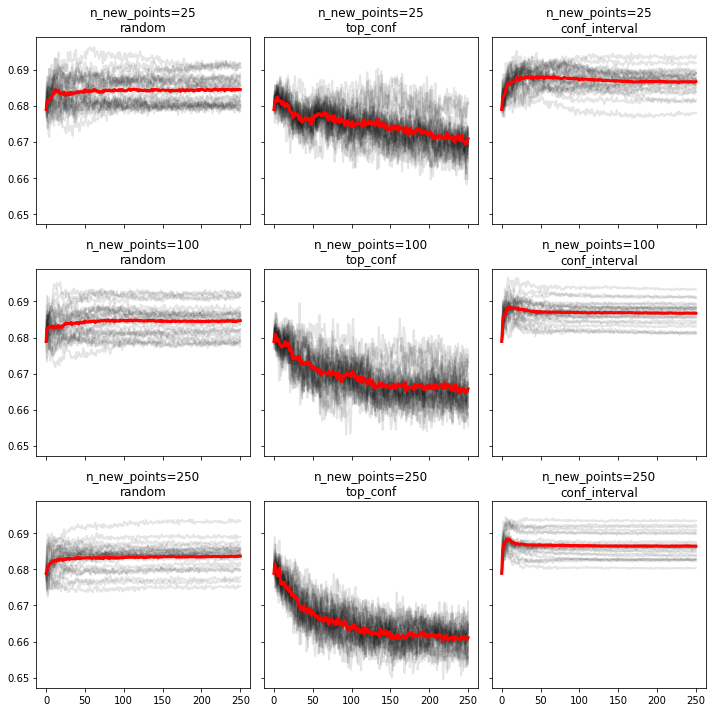

In [67]:
experiments = [key for key in results.keys() if "_accuracy" not in key]
models = list(results[experiments[0]].keys())

fig, ax = plt.subplots(len(experiments), len(models), figsize=(10, 10), sharex=True, sharey=True)

for i, experiment in enumerate(experiments):
    for j, model in enumerate(models):

        for data in results[experiment][model]:
            ax[i, j].plot(data, alpha=0.1, c="k", lw=2)

        mean = np.mean(results[experiment][model], 0)
        ax[i, j].plot(mean, lw=3, c="r")
        ax[i, j].set_title(f"{experiment}\n{model}")

plt.tight_layout()

In [68]:
# TL; DR ?
#
# - probably don't need 250 iterations; things seem to converge quite quickly
# - improvement in accuracy is much less than I expected
# - method of choosing unlabeled data to pseudolabel is important

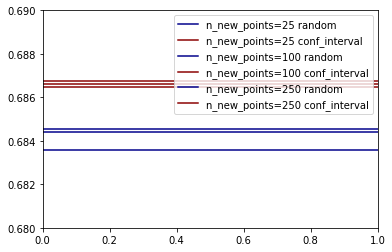

In [75]:
def plateau(data, n_last=50):
    return np.array(data)[:, -n_last:].mean()

colours = ["darkblue", "darkred"]

for experiment in experiments:
    for i, model in enumerate(["random", "conf_interval"]):
        plt.axhline(plateau(results[experiment][model]), label=f"{experiment} {model}", c=colours[i])

plt.ylim(0.68, 0.69)
plt.legend()